In [1]:
import sys
import os

## sklearn
import sklearn.metrics
from sklearn import mixture
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
# logistic regression
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# SVM
from sklearn.datasets._samples_generator import make_blobs
from sklearn.svm import SVC
# K-fold 
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

## pandas
import pandas as pd
from pandas import DataFrame #LR

## numpy
import numpy as np
from numpy import loadtxt, where #LR
from numpy import mean

from tqdm import tqdm
from datetime import datetime,timedelta
from xgboost import XGBClassifier
import pickle
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import statsmodels.api as sm
from scipy.integrate import simps
import seaborn as sns
from pylab import scatter, show, legend, xlabel, ylabel







font = {'family' : 'normal','size'   : 20}
plt.rc('font', **font)
plt.rc('figure', titlesize=16)

if 'imac' in os.getcwd():
    macFlag=True
else:
    macFlag=False

In [2]:
testDays=np.array([[datetime(2018,7,20),datetime(2018,7,13),datetime(2018,7,27),datetime(2018,7,10),datetime(2018,6,22),datetime(2018,7,3),datetime(2018,7,17),datetime(2018,6,25),datetime(2018,7,24)],
           [datetime(2018,7,19),datetime(2018,6,28),datetime(2018,7,20),datetime(2018,7,27),datetime(2018,7,3),datetime(2018,6,22),datetime(2018,7,26),datetime(2018,6,29),datetime(2018,7,13)],
           [datetime(2018,8,16),datetime(2018,8,8),datetime(2018,8,10),datetime(2018,7,30),datetime(2018,8,20),datetime(2018,8,3),datetime(2018,8,1),datetime(2018,8,17),datetime(2018,8,15)],
           [datetime(2018,8,28),datetime(2018,8,15),datetime(2018,8,14),datetime(2018,8,29),datetime(2018,8,20),datetime(2018,8,22),datetime(2018,8,27),datetime(2018,8,21),datetime(2018,8,16)],
           [datetime(2018,9,6),datetime(2018,9,13),datetime(2018,9,18),datetime(2018,9,14),datetime(2018,9,20),datetime(2018,9,11),datetime(2018,9,17),datetime(2018,9,5),datetime(2018,9,4)],
           [datetime(2018,9,18),datetime(2018,9,14),datetime(2018,9,25),datetime(2018,9,13),datetime(2018,10,3),datetime(2018,10,2),datetime(2018,9,27),datetime(2018,9,17),datetime(2018,9,26)],
           [datetime(2018,10,4),datetime(2018,10,9),datetime(2018,9,25),datetime(2018,10,11),datetime(2018,9,26),datetime(2018,10,3),datetime(2018,10,10),datetime(2018,9,27),datetime(2018,10,2)]
           ]).astype(datetime)

testDaysMealNumbers=np.zeros((7,9,2))
for i in range(7):
    for j in range(9):
        tempDay=testDays[i,j]
        testDaysMealNumbers[i,j,0]=tempDay.timetuple().tm_yday
        testDaysMealNumbers[i,j,1]=j

In [3]:
#Separating the test days from normal ones
def dataSanitizer(rootAddressAllData,rootAddressSanitized):
    os.chdir(rootAddressAllData)
    patientName=['38A','38B','38C','38D','38E','38F','38H']
    fileNames=os.listdir()

    for fileName in fileNames:
        for counter in range(7):
            if patientName[counter] in fileName:
                currentPatient=counter
                break
        print(fileName)
        myDf=pd.read_csv(fileName)
        for myColumn in myDf.columns:
            if myColumn not in ['time','BG','Participant']:
                del myDf[myColumn]
        myDf=myDf.dropna()
        myDf=myDf.drop_duplicates(subset=['time'], keep='last')
        myDf['time']= pd.to_datetime(myDf['time'])

        myDf.insert(3,"StandardTest",0)
        for rowCounter in range(0,len(myDf)):
            for counter in range(0,9):
                if myDf.iloc[rowCounter,1].date()==testDays[currentPatient][counter].date():
                    myDf.iloc[rowCounter,3]=counter+1
                    break

        myDf=myDf[myDf.StandardTest > 0]
        myFileAddress=rootAddressSanitized+patientName[currentPatient]+'.csv'
        myDf.to_csv(myFileAddress,index = False)

if not macFlag:
    rootAddressAllData=r'C:\GitHub\STMI-CGM\Selected-38'
    rootAddressSanitized=r'C:\GitHub\STMI-CGM\Sanitized38\TestDays_'
else:
    rootAddressAllData='/Users/imac/Desktop/School/Spring2021/STMI/STMI-CGM/Selected-38'
    rootAddressSanitized='/Users/imac/Desktop/School/Spring2021/STMI/STMI-CGM/Selected-38/TestDays_'
dataSanitizer(rootAddressAllData,rootAddressSanitized)


overall_spread_sheet_38H.csv
TestDays_38H.csv
TestDays_38D.csv
overall_spread_sheet_38A.csv
TestDays_38E.csv
overall_spread_sheet_38B.csv
overall_spread_sheet_38C.csv
TestDays_38F.csv
TestDays_38B.csv
overall_spread_sheet_38F.csv
TestDays_38C.csv
TestDays_38A.csv
overall_spread_sheet_38D.csv
overall_spread_sheet_38E.csv


The BG base line is not found for 176 and we used 80.0001
> k=1, Mean ROC AUC: nan
> k=2, Mean ROC AUC: nan
> k=3, Mean ROC AUC: nan
> k=4, Mean ROC AUC: nan
> k=5, Mean ROC AUC: nan
> k=6, Mean ROC AUC: nan
> k=7, Mean ROC AUC: nan
> Best k=0, Best mean ROC AUC: -1.000
The best model for participant: 38A has accuracy= 100.0 recall= 100.0 precision= 100.0
For RF model, the hyper-parameters are: Threshold= 0.6 tree number= 4 max depth= 9


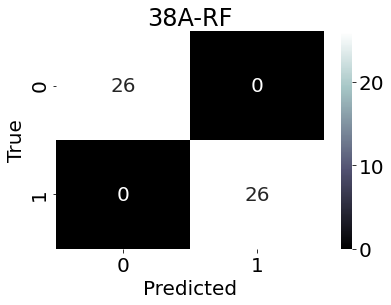

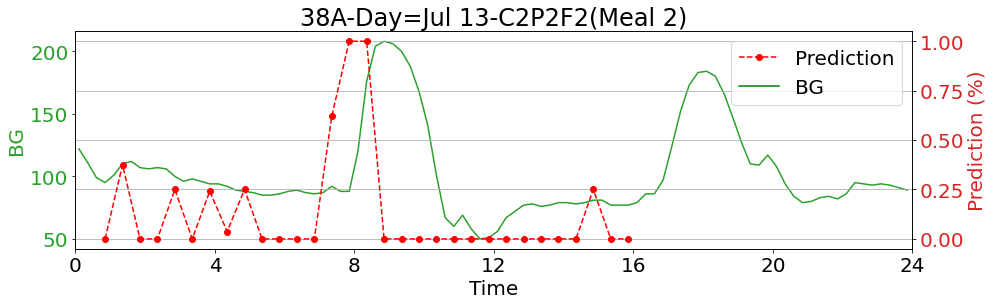

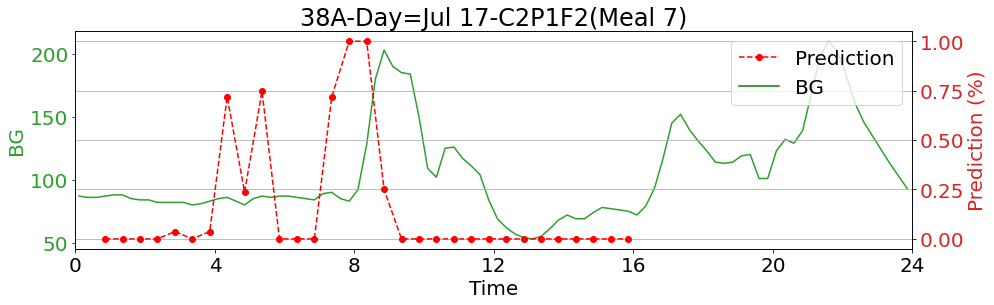

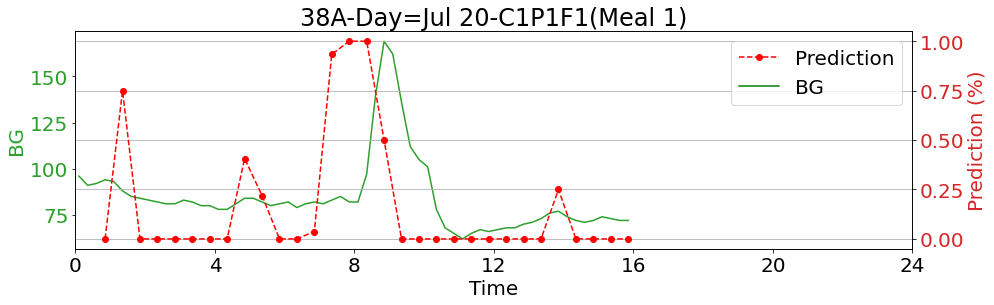

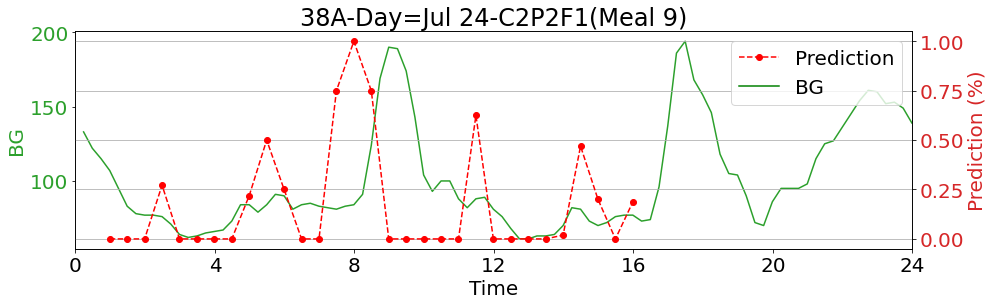

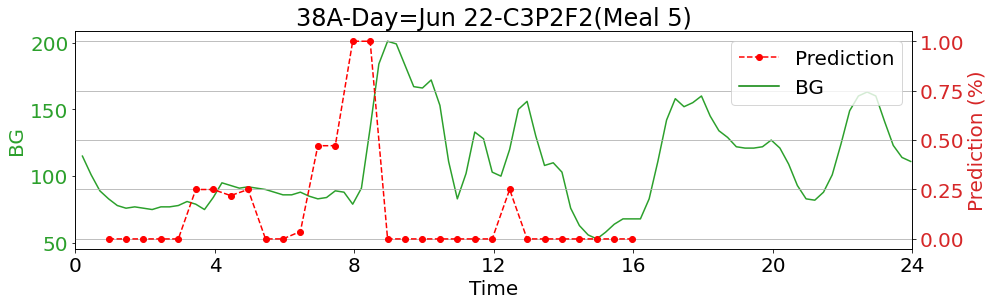

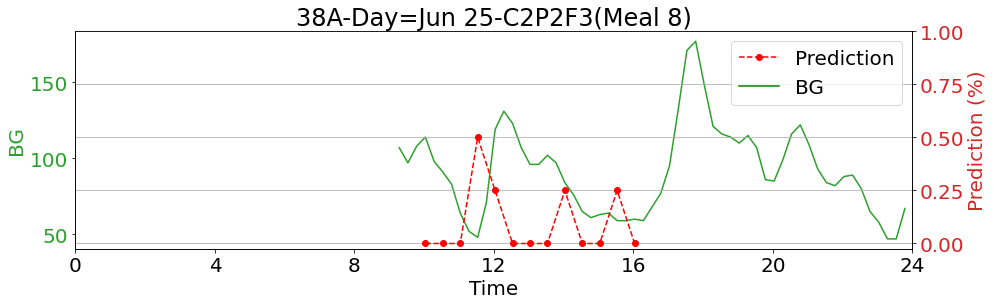

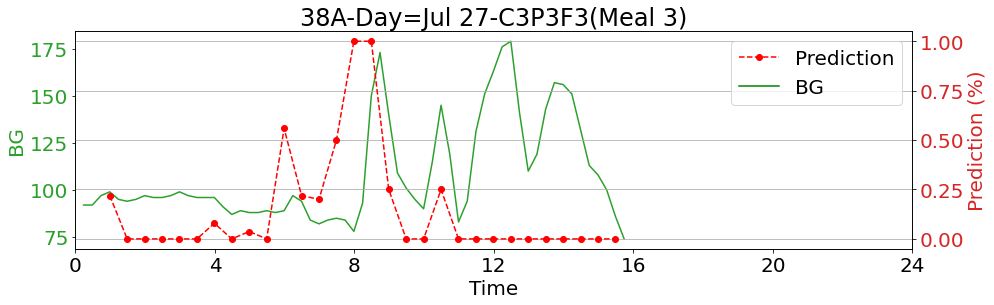

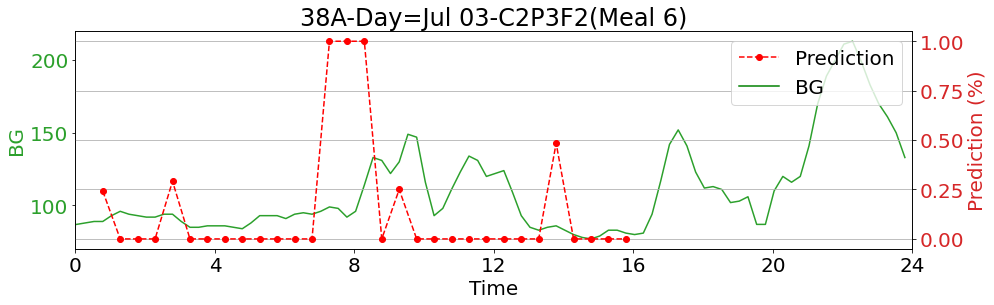

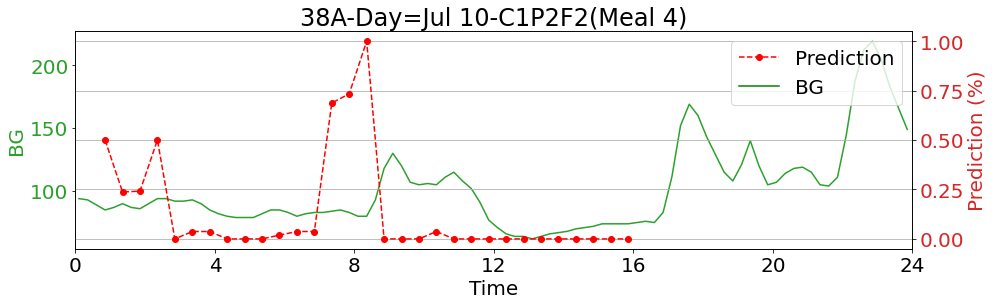

------------------------------------------------
The importance of each feature is shown below (the averaged value of all cases)
('Average', 7.2)
('STD', 7.6)
('Min', 3.3)
('Max', 2.8)
('Min Slope', 19.0)
('Max Slope', 16.4)
('1st half slope', 6.9)
('2nd half slope', 20.3)
('Integral Value', 3.7)
('Min Concavity', 3.4)
('Max Concavity', 9.3)


In [20]:
#Setting Logistic Regression algorithm and testing all hyper-parameters
def STMI_logistic_regression(trainData,testData,trainLabels,testLabels,patientName):
    accuracyBest=-1
    recallBest=-1
    precisionBest=-1
    confMatrixBest=[]
    for threshold_counter in np.arange(0.4, 0.8, 0.2):
        for C in [0.5,1,1.5,2]:
            clf = LogisticRegression(C=C,max_iter=10000)
            clf.fit(trainData, trainLabels)
            sliddingWindowPrediction = clf.predict_proba(testData)
            sliddingWindowPrediction = sliddingWindowPrediction[:, 1]
            sliddingWindowPrediction[sliddingWindowPrediction >= threshold_counter] = 1
            sliddingWindowPrediction[sliddingWindowPrediction < threshold_counter] = 0

            confMatrix=sklearn.metrics.confusion_matrix(testLabels,sliddingWindowPrediction)
            accuracy=sklearn.metrics.accuracy_score(testLabels,sliddingWindowPrediction)
            recall=sklearn.metrics.recall_score(testLabels,sliddingWindowPrediction)
            precision=sklearn.metrics.precision_score(testLabels,sliddingWindowPrediction)

            if accuracy > accuracyBest:
                accuracyBest = accuracy
                recallBest = recall
                precisionBest = precision
                confMatrixBest = confMatrix
                threshBest = threshold_counter
                modelBest = clf

                CBest=C

    features = "NaN"
    print("The best model for participant:",patientName,"has accuracy=",round(accuracyBest*100,1)
          ,"recall=",round(recallBest*100,1),"precision=",round(precisionBest*100,1))
    print("For LR model, the hyper-parameters are:","Threshold=",round(threshBest,2),"C=",CBest)
    plt.figure()
    sns.heatmap(confMatrixBest, annot=True,cmap='bone')
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(patientName)

    if not macFlag:
        file_name = "C:\\GitHub\\STMI-CGM\\Sanitized38\\LR" + patientName + ".pkl"
    else:
        file_name = "/Users/imac/Desktop/School/Spring2021/STMI/STMI-CGM/Sanitized38/LR" + patientName + ".pkl"
    pickle.dump(modelBest, open(file_name, "wb"))

    return modelBest, threshBest, features

#Setting SVM algorithm and testing all hyper-parameters
def STMI_SVM(trainData,testData,trainLabels,testLabels,patientName):
    kernels = ['linear', 'poly', 'rbf']
    accuracyBest=-1
    recallBest=-1
    precisionBest=-1
    confMatrixBest=[]
    for kernel in kernels:
        for threshold in np.arange(0.4, 0.8, 0.2):
            for C in np.arange(0.5, 2, 0.5):
                for gamma in np.arange(0.05, 0.15, 0.05):
                    clf = SVC(kernel=kernel,gamma=gamma,probability=True)
                    clf.fit(trainData, trainLabels)
                    sliddingWindowPrediction = clf.predict_proba(testData)
                    sliddingWindowPrediction = sliddingWindowPrediction[:, 1]
                    sliddingWindowPrediction[sliddingWindowPrediction >= threshold] = 1
                    sliddingWindowPrediction[sliddingWindowPrediction < threshold] = 0

                    confMatrix=sklearn.metrics.confusion_matrix(testLabels,sliddingWindowPrediction)
                    accuracy=sklearn.metrics.accuracy_score(testLabels,sliddingWindowPrediction)
                    recall=sklearn.metrics.recall_score(testLabels,sliddingWindowPrediction)
                    precision=sklearn.metrics.precision_score(testLabels,sliddingWindowPrediction)

                    if accuracy > accuracyBest:
                        modelBest = clf
                        threshBest = threshold
                        kernelBest=kernel
                        CBest=C
                        gammaBest=gamma

                        confMatrixBest = confMatrix
                        accuracyBest = accuracy
                        recallBest = recall
                        precisionBest = precision

                    if kernel=='linear':
                        break

    features = "NaN"
    print("The best model for participant:",patientName,"has accuracy=",round(accuracyBest*100,1)
          ,"recall=",round(recallBest*100,1),"precision=",round(precisionBest*100,1))
    print("For SVM model, the hyper-parameters are:","Threshold=",round(threshBest,2),"kernel=",kernelBest,"C=",
          round(CBest,2),"Gamma=",round(gammaBest,2))
    plt.figure()
    sns.heatmap(confMatrixBest, annot=True,cmap='bone')
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(patientName)

    if not macFlag:
        file_name = "C:\\GitHub\\STMI-CGM\\Sanitized38\\SVM" + patientName + ".pkl"
    else:
        file_name = "/Users/imac/Desktop/School/Spring2021/STMI/STMI-CGM/Sanitized38/SVM" + patientName + ".pkl"
    pickle.dump(modelBest, open(file_name, "wb"))

    return modelBest, threshBest, features

#Setting Random Forest algorithm and testing all hyper-parameters
def STMI_random_forest(trainData,testData,trainLabels,testLabels,patientName):
    treeNumBest=-1
    maxDepthBest=-1
    accuracyBest=-1
    recallBest=-1
    precisionBest=-1
    confMatrixBest=[]
    for threshold in np.arange(0.4,0.8,0.2):
        for treeNum in np.arange(3,10):
            for maxDepth in np.arange(3,10):
                clf=RandomForestClassifier(n_estimators=treeNum,criterion='entropy',random_state=0,max_depth=maxDepth)
                clf.fit(trainData,trainLabels)
                sliddingWindowPrediction=clf.predict_proba(testData)
                sliddingWindowPrediction=sliddingWindowPrediction[:,1]
                sliddingWindowPrediction[sliddingWindowPrediction>=threshold]=1
                sliddingWindowPrediction[sliddingWindowPrediction<threshold]=0

                confMatrix=sklearn.metrics.confusion_matrix(testLabels,sliddingWindowPrediction)
                accuracy=sklearn.metrics.accuracy_score(testLabels,sliddingWindowPrediction)
                recall=sklearn.metrics.recall_score(testLabels,sliddingWindowPrediction)
                precision=sklearn.metrics.precision_score(testLabels,sliddingWindowPrediction)

                if accuracy>accuracyBest:
                    confMatrixBest=confMatrix
                    threshBest=threshold

                    accuracyBest=accuracy
                    recallBest=recall
                    precisionBest=precision

                    modelBest=clf
                    treeNumBest=treeNum
                    maxDepthBest=maxDepth

    features=np.round(modelBest.feature_importances_*100,1)
    print("The best model for participant:",patientName,"has accuracy=",round(accuracyBest*100,1)
          ,"recall=",round(recallBest*100,1),"precision=",round(precisionBest*100,1))
    print("For RF model, the hyper-parameters are:","Threshold=",round(threshBest,2),"tree number=",treeNumBest,"max depth=",maxDepthBest)
    plt.figure()
    sns.heatmap(confMatrixBest, annot=True,cmap='bone')
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(patientName+'-'+modelingMethod)
    if not macFlag:
        file_name = r"C:\GitHub\STMI-CGM\Sanitized38\RF"+patientName+".pkl"
    else:
        file_name= "/Users/imac/Desktop/School/Spring2021/STMI/STMI-CGM/Sanitized38/RF"+patientName+".pkl"
    pickle.dump(modelBest, open(file_name, "wb"))
    return modelBest,threshBest,features

#Setting XGBoost algorithm and testing all hyper-parameters
def STMI_XGBoost(trainData,testData,trainLabels,testLabels,patientName):
    etaBest=-1
    maxDepthBest=-1
    accuracyBest=-1
    recallBest=-1
    precisionBest=-1
    confMatrixBest=[]
    for threshold in np.arange(0.4,0.8,0.2):
        for eta in np.arange(0.05,0.50,0.05):
            for maxDepth in np.arange(3,10):
                clf = XGBClassifier(eta=eta,max_depth=maxDepth,objective = "binary:logistic",eval_metric = "logloss",use_label_encoder =False)
                clf.fit(trainData, trainLabels)
                sliddingWindowPrediction = clf.predict_proba(testData)
                sliddingWindowPrediction=sliddingWindowPrediction[:,1]
                sliddingWindowPrediction[sliddingWindowPrediction>=threshold]=1
                sliddingWindowPrediction[sliddingWindowPrediction<threshold]=0

                confMatrix=sklearn.metrics.confusion_matrix(testLabels,sliddingWindowPrediction)
                accuracy=sklearn.metrics.accuracy_score(testLabels,sliddingWindowPrediction)
                recall=sklearn.metrics.recall_score(testLabels,sliddingWindowPrediction)
                precision=sklearn.metrics.precision_score(testLabels,sliddingWindowPrediction)

                if accuracy>accuracyBest:
                    confMatrixBest=confMatrix
                    accuracyBest=accuracy
                    recallBest=recall
                    precisionBest=precision

                    etaBest=eta
                    maxDepthBest=maxDepth
                    threshBest=threshold
                    modelBest=clf

    features=np.round(modelBest.feature_importances_*100,1)

    print("The best model for participant:",patientName,"has accuracy=",round(accuracyBest*100,1)
          ,"recall=",round(recallBest*100,1),"precision=",round(precisionBest*100,1))
    print("For XG model, the hyper-parameters are:","Threshold=",round(threshBest,2),"eta=",round(etaBest,2),
          "max depth=",maxDepthBest)
    plt.figure()
    sns.heatmap(confMatrixBest, annot=True,cmap='bone')
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(patientName)
    if not macFlag:
        file_name = r"C:\GitHub\STMI-CGM\Sanitized38\XG"+patientName+".pkl"
    else:
        file_name= "/Users/imac/Desktop/School/Spring2021/STMI/STMI-CGM/Sanitized38/XG"+patientName+".pkl"
    pickle.dump(modelBest, open(file_name, "wb"))

    return modelBest,threshBest,features

#Finding the fasting blood glucose value for each day
def fastingBGFinder(query,currentDay):
    fastingBG=80.0001
    fastingQuery=query[query['Time']>=3]
    fastingQuery=fastingQuery[fastingQuery['Time']<=6]

    if(not np.isnan(fastingQuery.BG.mean())):
        fastingBG=fastingQuery.BG.mean()
    else:
        print("The BG base line is not found for",currentDay,"and we used 80.0001")
    return fastingBG

#Calculating the statistics for each slidding window
def statCalculator(query,baseLine):
    integralValue=simps(query.iloc[:,3]-baseLine,x=query.iloc[:,2])

    maxSlopeValue=np.gradient(query.iloc[:,3]-baseLine,query.iloc[:,2])
    maxSlopeValue=np.max(maxSlopeValue)

    minSlopeValue=np.gradient(query.iloc[:,3]-baseLine,query.iloc[:,2])
    minSlopeValue=np.min(minSlopeValue)

    pointNum=len(query)-1
    if query.iloc[int(pointNum/2),2]==query.iloc[0,2]:
        print(query)
        sys.exit('The window qurery is not big enough. The minimum window duration should be more than 1 hour')

    firstHalfSlope=query.iloc[int(pointNum/2),3]-query.iloc[0,3]
    firstHalfSlope/=query.iloc[int(pointNum/2),2]-query.iloc[0,2]

    secondHalfSlope=query.iloc[pointNum,3]-query.iloc[int(pointNum/2),3]
    secondHalfSlope/=query.iloc[pointNum,2]-query.iloc[int(pointNum/2),2]

    maxConcavityValue=np.gradient(query.iloc[:,3]-baseLine,query.iloc[:,2])
    maxConcavityValue=np.gradient(maxConcavityValue,query.iloc[:,2])
    maxConcavityValue=np.max(maxConcavityValue)

    minConcavityValue=np.gradient(query.iloc[:,3]-baseLine,query.iloc[:,2])
    minConcavityValue=np.gradient(minConcavityValue,query.iloc[:,2])
    minConcavityValue=np.min(minConcavityValue)

    meanValue=query['BG'].mean()-baseLine
    stdValue=query['BG'].std()
    minValue=query['BG'].min()-baseLine
    maxValue=query['BG'].max()-baseLine

    return meanValue,stdValue,minValue,maxValue,minSlopeValue,maxSlopeValue,firstHalfSlope,secondHalfSlope,integralValue,minConcavityValue,maxConcavityValue

#Chopping the data into daily values and forming the sliddingWindow
def sliddingWindowMaker(allDays,rawData):
    sliddingWindow=[]
    sliddingWindowLabel=[]
    for dayCounter in range(len(allDays)):
        currentDay=allDays[dayCounter]
        dayQuery=rawData[rawData['Day of Year']==currentDay]
        startTime=dayQuery.iloc[0,2]
        endTime=startTime+timeWindow
        fastingBG=fastingBGFinder(dayQuery,currentDay)

        windowQuery=dayQuery[dayQuery['Time']>=startTime]
        windowQuery=windowQuery[windowQuery['Time']<endTime]
        while len(windowQuery)>=(timeWindow*4/2):
            if endTime>17:
                break #after 4PM the participants go home and they don't hold the criteria anymore
            if startTime<=breakfastTime and endTime>=breakfastTime:
                eatFlag=1
            else:
                eatFlag=0
            statInfo=statCalculator(windowQuery,fastingBG)
            statInfo=list(statInfo)
            statInfo.extend([startTime,endTime,currentDay])
            sliddingWindow.append(statInfo)
            sliddingWindowLabel.append(eatFlag)

            startTime+=timeStep
            endTime+=timeStep
            windowQuery=dayQuery[dayQuery['Time']>=startTime]
            windowQuery=windowQuery[windowQuery['Time']<endTime]

    sliddingWindow=np.array(sliddingWindow,dtype=float)
    sliddingWindowLabel=np.array(sliddingWindowLabel,dtype=int)
    return sliddingWindow,sliddingWindowLabel

#Reading the CSV for each participant and calculating the day of year and time (decimal format)
def csvReader(csvAddress):
    rawData=pd.read_csv(csvAddress)
    for myColumn in rawData.columns:
        if myColumn not in ['time','BG','Participant']:
            del rawData[myColumn]

    rawData['time']= pd.to_datetime(rawData['time'])
    rawData['BG']= pd.to_numeric(rawData['BG'])

    rawData=rawData.dropna()
    rawData=rawData.drop_duplicates(subset=['time'], keep='last')

    rawData.insert(2, "Day of Year",rawData['time'].dt.dayofyear)
    rawData.insert(3, "Time",rawData['time'].dt.hour+
                   rawData['time'].dt.minute/60+rawData['time'].dt.second/3600)
    rawData=rawData.drop(columns=['time'])
    rawData=rawData.sort_values(['Day of Year', 'Time'], ascending=[True, True])

    allDays=rawData['Day of Year'].tolist()
    allDays=set(allDays)
    allDays=list(allDays)
    return allDays,rawData

#Splitting the data into train and test
def dataSplitter(sliddingWindow,sliddingWindowLabel):
    balancedSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.3,random_state=2)
    for trainIndex, testIndex in balancedSplit.split(sliddingWindow, sliddingWindowLabel):
        trainData, testData = sliddingWindow[trainIndex,:], sliddingWindow[testIndex,:]
        trainLabel, testLabel = sliddingWindowLabel[trainIndex], sliddingWindowLabel[testIndex]
    return trainData,testData,trainLabel,testLabel

#Balacing the sliddingWindow data using SMOTE
# modify to only apply smote to train data 
def dataBalancer(sliddingWindow,sliddingWindowLabel):
    oversample = SMOTE()
    sliddingWindowSMOTE, sliddingWindowLabelSMOTE = oversample.fit_resample(sliddingWindow, sliddingWindowLabel)
    return sliddingWindowSMOTE, sliddingWindowLabelSMOTE

#Plotting the BG time-series and the binary classification results on top of that
def windowVisualizer(rawData,modelingMethod,bestModel,bestThreshold,testMealNum,patientName,sliddingWindow, sliddingWindowLabel, startTime,endTime,days):
    mealContent=['C1P1F1','C2P2F2','C3P3F3',
                 'C1P2F2','C3P2F2','C2P3F2',
                 'C2P1F2','C2P2F3','C2P2F1']
    allDays=set(days)
    allDays=list(allDays)
    for dayCounter in range(len(allDays)):
        fig, ax1 = plt.subplots(figsize=(15,4))
        newQuery=rawData[rawData['Day of Year']==allDays[dayCounter]]

        color = 'tab:green'
        ax1.set_xlabel('Time')
        ax1.set_ylabel('BG', color=color)
        ax1.plot(newQuery['Time'],newQuery['BG'], color=color)
        ax1.tick_params(axis='y', labelcolor=color)
        ax1.set_xlim([0,24])
        ax1.set_xticks(np.arange(0, 26, 4))

        tempData=[]
        tempLabel=[]
        tempStart=[]
        tempEnd=[]
        for counter in range(sliddingWindow.shape[0]):
            if days[counter]==allDays[dayCounter]:
                tempData.append(sliddingWindow[counter,:])
                tempLabel.append(sliddingWindowLabel[counter])
                tempStart.append(startTime[counter])
                tempEnd.append(endTime[counter])

        tempData=np.array(tempData,dtype=float)
        tempLabel=np.asarray(tempLabel,dtype=int)
        tempStart=np.asarray(tempStart,dtype=float)
        tempEnd=np.asarray(tempEnd,dtype=float)

        if len(tempData)==0:
            sys.exit(("--------Warning, the slidding window is empty for prediction on day:"+allDays[dayCounter]))

        if modelingMethod=='XG' or modelingMethod=='RF' or modelingMethod=='SVM':
            tempPred=bestModel.predict_proba(tempData)
            tempPred=tempPred[:,1]
            # tempPred[tempPred>=bestThreshold]=1
            # tempPred[tempPred<bestThreshold]=0

        if modelingMethod=='LR':
            tempPred=bestModel.predict(tempData)

        ax2 = ax1.twinx()
        ax2.plot(np.mean( np.array([tempStart,tempEnd]),axis=0),tempPred,linestyle='--', marker='o', color='r')
        # for counter in range(len(tempPred)):

            # if tempPred[counter]==tempLabel[counter]:
            #     ax2.plot([tempStart[counter],tempEnd[counter]],np.ones((2,1))*tempPred[counter],
            #              linestyle='--', marker='o', color='b')
            # else:
            #     ax2.plot([tempStart[counter],tempEnd[counter]],np.ones((2,1))*tempPred[counter],
            #              linestyle='--', marker='o', color='r')
        # ax2.plot([],[],linestyle='--', marker='o', color='r',label='miss-classified')
        # ax2.plot([],[],linestyle='--', marker='o', color='b',label='Correctly Classified')
        ax2.plot([],[],linestyle='--', marker='o', color='r',label='Prediction')
        ax2.plot([],[],linestyle='-', color='g',label='BG')
        ax2.legend()
        for counter in range(9):
            if testMealNum[counter,0]==allDays[dayCounter]:
                tempMealName=testMealNum[counter,1]
        tempMealName=int(tempMealName)
        tempDate=datetime(2018, 1, 1) + timedelta(allDays[dayCounter] - 1)
        tempDate=tempDate.strftime("%b %d")
        plt.title(patientName+"-Day="+tempDate+"-"+mealContent[tempMealName]+
                  "(Meal "+str(tempMealName+1)+")",color='black')

        color='tab:red'
        ax2.set_ylabel('Prediction (%)', color=color)
        ax2.tick_params(axis='y', labelcolor=color)
        ax2.set_yticks([0,0.25,0.50,0.75,1])
        ax2.set_xlim([0,24])
        ax2.set_xticks(np.arange(0, 26, 4))

        plt.grid()
        plt.show()

#Calling the model (RF or XGBoost) and returning the model details to the main function
def modelTrainer(modelingMethod,trainData,testData,trainLabel,testLabel,patientName):
    if modelingMethod=='RF':
        modelResult=STMI_random_forest(trainData,testData,trainLabel,testLabel,patientName)
    if modelingMethod=='XG':
        modelResult=STMI_XGBoost(trainData,testData,trainLabel,testLabel,patientName)
    if modelingMethod == 'LR':
        modelResult = STMI_logistic_regression(trainData, testData, trainLabel, testLabel, patientName)
    if modelingMethod == 'SVM':
        modelResult = STMI_SVM(trainData, testData, trainLabel, testLabel, patientName)
    return modelResult

def featureInterpretor(featureImportance):
    featureImportance=np.asarray(featureImportance,dtype=float)
    featureImportance=np.mean(featureImportance,axis=0)
    featureImportance=np.round(featureImportance,2)
    feat_labels = ['Average','STD','Min','Max','Min Slope', 'Max Slope','1st half slope','2nd half slope','Integral Value','Min Concavity','Max Concavity']
    print("The importance of each feature is shown below (the averaged value of all cases)")
    for feature in zip(feat_labels,featureImportance):
        print(feature)

#Setting the patientName and testMealNumber for each patient based on the CSV fileName
def participantReaderAux(fileName):
    if (fileName=='TestDays_38A.csv'):
        patientName='38A'
        testMealNum=testDaysMealNumbers[0,:,:]
    if (fileName=='TestDays_38B.csv'):
        patientName='38B'
        testMealNum=testDaysMealNumbers[1,:,:]
    if (fileName=='TestDays_38C.csv'):
        patientName='38C'
        testMealNum=testDaysMealNumbers[2,:,:]
    if (fileName=='TestDays_38D.csv'):
        patientName='38D'
        testMealNum=testDaysMealNumbers[3,:,:]
    if (fileName=='TestDays_38E.csv'):
        patientName='38E'
        testMealNum=testDaysMealNumbers[4,:,:]
    if (fileName=='TestDays_38F.csv'):
        patientName='38F'
        testMealNum=testDaysMealNumbers[5,:,:]
    if (fileName=='TestDays_38H.csv'):
        patientName='38H'
        testMealNum=testDaysMealNumbers[6,:,:]
    return patientName,testMealNum

def StratifiedKFoldCrossVal(n_splits, modelingMethod, sliddingWindow, sliddingWindowLabel):
    bestKVal=0
    bestScore=-1
    kVals = [1, 2, 3, 4, 5 ,6, 7]
    
    if modelingMethod=='RF':
        model=RandomForestClassifier()
    if modelingMethod=='XG':
        model=XGBClassifier()
    if modelingMethod == 'LR':
        model = LogisticRegression()
    if modelingMethod == 'SVM':
        model = SVC()
        
    for k in kVals: 
        over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
        under = RandomUnderSampler(sampling_strategy=0.5)
        steps = [('over', over), ('under', under), ('model', model)]
        pipeline = Pipeline(steps=steps)
        cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=3, random_state=1)
        scores = cross_val_score(pipeline, sliddingWindow, sliddingWindowLabel, scoring='roc_auc', cv=cv, n_jobs=-1)
        score = mean(scores)
        print('> k=%d, Mean ROC AUC: %.3f' % (k, score))
        if score > bestScore:
            bestKVal = k
            bestScore = score
    print('> Best k=%d, Best mean ROC AUC: %.3f' % (bestKVal, bestScore))
    
    oversample = SMOTE()
    dataX, dataY = oversample.fit_resample(sliddingWindow, sliddingWindowLabel)
    kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)
    for train_ix, test_ix in cv.split(dataX, dataY):
        trainX, testX = dataX[train_ix], dataX[test_ix]
        trainY, testY = dataY[train_ix], dataY[test_ix]
        
    return trainX, testX, trainY, testY

#The main function which 1)sets the meal details and participant name, 2)reads the participant CSV data,
# 3)forming the daily slidding window, 4)balancing the data using SMOTE, 5)splitting the data to test and train
# 6)calling the XGBoost/Random Forest model, 7)visualizing the daily data, 8)reporting the importance of each statistical feature
def participantReader(folderAddress,plotFlag,modelingMethod):
    os.chdir(folderAddress)
    fileNames=os.listdir(folderAddress)
    featureImportance=[]
    for fileName in fileNames:
        if '.csv' not in fileName:
            continue;
        if '38A' not in fileName:
            continue
        patientName,testMealNum=participantReaderAux(fileName)
        
        allDays,rawData=csvReader(fileName)
        # modify sliding window maker to include date 
        sliddingWindow,sliddingWindowLabel=sliddingWindowMaker(allDays,rawData)
        # seperate train and test data 
        sliddingWindowSMOTE,sliddingWindowLabelSMOTE= dataBalancer(sliddingWindow[:,0:11],sliddingWindowLabel)
        # below is the data splitter just gotta modify 
        trainData,testData,trainLabel,testLabel=dataSplitter(sliddingWindowSMOTE, sliddingWindowLabelSMOTE)
        trainData,testData,trainLabel,testLabel=StratifiedKFoldCrossVal(9, modelingMethod, sliddingWindow[:,0:11], sliddingWindowLabel)
        del sliddingWindowSMOTE, sliddingWindowLabelSMOTE
        modelResult=modelTrainer(modelingMethod,trainData,testData,trainLabel,testLabel,patientName)
        statFeature=modelResult[2]
        featureImportance.append(statFeature)
        if plotFlag:
            windowVisualizer(rawData,modelingMethod,modelResult[0],modelResult[1],testMealNum,patientName,sliddingWindow[:,0:11],sliddingWindowLabel,sliddingWindow[:,11],sliddingWindow[:,12],sliddingWindow[:,13])
        print('------------------------------------------------')
    if not modelingMethod == 'LR' and not modelingMethod == 'SVM':
        featureInterpretor(featureImportance)

if not macFlag:
    rootAddress=r"C:\GitHub\STMI-CGM\Sanitized38"
else:
    rootAddress= "/Users/imac/Desktop/School/Spring2021/STMI/STMI-CGM/Sanitized38"
timeWindow=90/60
timeStep=30/60
breakfastTime=8
plotFlag=True
modelingMethod='RF'#XG,RF,'LR','SVM'
participantReader(rootAddress,plotFlag,modelingMethod)

In [ ]:
#Chopping the data into daily values and forming the sliddingWindow
def sliddingWindowMakerTest(allDays,rawData):
    sliddingWindow=[]
    sliddingWindowLabel=[]
    for dayCounter in range(len(allDays)):
        currentDay=allDays[dayCounter]
        testDayFlag=False
        for element in testDaysMealNumbers[0,:,0]:
            if currentDay==element:
                testDayFlag=True
        if testDayFlag:
            continue

        dayQuery=rawData[rawData['Day of Year']==currentDay]
        startTime=dayQuery.iloc[0,2]
        endTime=startTime+timeWindow
        fastingBG=fastingBGFinder(dayQuery,currentDay)

        windowQuery=dayQuery[dayQuery['Time']>=startTime]
        windowQuery=windowQuery[windowQuery['Time']<endTime]
        while startTime<24:
            if len(windowQuery)<4:
                startTime+=timeStep
                endTime+=timeStep
                windowQuery=dayQuery[dayQuery['Time']>=startTime]
                windowQuery=windowQuery[windowQuery['Time']<endTime]
                continue
            if windowQuery['Eat Flag'].sum()>=1:
                eatFlag=1
            else:
                eatFlag=0
            statInfo=statCalculator(windowQuery,fastingBG)
            statInfo=list(statInfo)
            statInfo.extend([startTime,endTime,currentDay])
            sliddingWindow.append(statInfo)
            sliddingWindowLabel.append(eatFlag)

            startTime+=timeStep
            endTime+=timeStep
            windowQuery=dayQuery[dayQuery['Time']>=startTime]
            windowQuery=windowQuery[windowQuery['Time']<endTime]

    sliddingWindow=np.array(sliddingWindow,dtype=float)
    sliddingWindowLabel=np.array(sliddingWindowLabel,dtype=int)
    return sliddingWindow,sliddingWindowLabel

def csvReaderTest(csvAddress):
    rawData=pd.read_csv(csvAddress)
    for myColumn in rawData.columns:
        if myColumn not in ['time','BG','Participant','Eat Flag','Test Day']:
            del rawData[myColumn]

    rawData['time']= pd.to_datetime(rawData['time'])
    rawData['BG']= pd.to_numeric(rawData['BG'])

    rawData=rawData.dropna()
    rawData=rawData.drop_duplicates(subset=['time'], keep='last')

    rawData.insert(2, "Day of Year",rawData['time'].dt.dayofyear)
    rawData.insert(3, "Time",rawData['time'].dt.hour+
                   rawData['time'].dt.minute/60+rawData['time'].dt.second/3600)
    rawData=rawData.drop(columns=['time'])
    rawData=rawData.sort_values(['Day of Year', 'Time'], ascending=[True, True])

    allDays=rawData['Day of Year'].tolist()
    allDays=set(allDays)
    allDays=list(allDays)

    return allDays,rawData

def windowVisualizerTest(rawData,bestModel,bestThreshold,patientName,sliddingWindow, sliddingWindowLabel, startTime,endTime,days):
    allDays=set(days)
    allDays=list(allDays)
    for dayCounter in range(len(allDays)):
        fig, ax1 = plt.subplots(figsize=(15,4))
        newQuery=rawData[rawData['Day of Year']==allDays[dayCounter]]
        mealQuery=newQuery[newQuery['Eat Flag']==1]
        color = 'tab:green'
        ax1.set_xlabel('Time')
        ax1.set_ylabel('BG', color=color)
        ax1.plot(newQuery['Time'],newQuery['BG'], color=color)
        ax1.tick_params(axis='y', labelcolor=color)
        ax1.set_xlim([0,24])
        ax1.set_xticks(np.arange(0, 26, 4))

        tempData=[]
        tempLabel=[]
        tempStart=[]
        tempEnd=[]
        for counter in range(sliddingWindow.shape[0]):
            if days[counter]==allDays[dayCounter]:
                tempData.append(sliddingWindow[counter,:])
                tempLabel.append(sliddingWindowLabel[counter])
                tempStart.append(startTime[counter])
                tempEnd.append(endTime[counter])

        tempData=np.array(tempData,dtype=float)
        tempLabel=np.asarray(tempLabel,dtype=int)
        tempStart=np.asarray(tempStart,dtype=float)
        tempEnd=np.asarray(tempEnd,dtype=float)

        if len(tempData)==0:
            sys.exit(("--------Warning, the slidding window is empty for prediction on day:"+allDays[dayCounter]))

        tempPred=bestModel.predict_proba(tempData)
        tempPred=tempPred[:,1]

        ax2 = ax1.twinx()
        if len(mealQuery)>0:
            for mealCounter in range(len(mealQuery)):
                mealStart=mealQuery.iloc[mealCounter,2]-0.1
                if mealCounter==0:
                    rect = patches.Rectangle((mealStart, 0), 0.2, 1, linewidth=1, edgecolor='magenta',
                                         facecolor='magenta',alpha=0.3,label='Meal')
                else:
                    rect = patches.Rectangle((mealStart, 0), 0.2, 1, linewidth=1, edgecolor='magenta',
                                         facecolor='magenta',alpha=0.3)
                ax2.add_patch(rect)
        ax2.plot(np.mean( np.array([tempStart,tempEnd]),axis=0),tempPred,linestyle='--', marker='o', color='r')
        ax2.plot([],[],linestyle='--', marker='o', color='r',label='Prediction')
        ax2.plot([],[],linestyle='-', color='g',label='BG')
        ax2.legend(loc=1)

        tempDate=datetime(2018, 1, 1) + timedelta(allDays[dayCounter] - 1)
        tempDate=tempDate.strftime("%b %d")
        plt.title(patientName+"-Day="+tempDate,color='black')

        color='tab:red'
        ax2.set_ylabel('Prediction (%)', color=color)
        ax2.tick_params(axis='y', labelcolor=color)
        ax2.set_yticks([0,0.25,0.50,0.75,1])
        ax2.set_xlim([0,24])
        ax2.set_xticks(np.arange(0, 26, 4))

        plt.grid()
        plt.show()

def predictorTest(patientName,modelingMethod,modelAddRoot,sliddingWindowTest,sliddingWindowLabelTest,threshBest):
    if modelingMethod=='RF':
        tempModelName=modelAddRoot+"RF"+patientName+".pkl"
        modelBest = pickle.load(open(tempModelName, 'rb'))
    if modelingMethod=='XG':
        tempModelName=modelAddRoot+"XG"+patientName+".pkl"
        modelBest = pickle.load(open(tempModelName, 'rb'))
    if modelingMethod=='LR':
        tempModelName=modelAddRoot+"LR"+patientName+".pkl"
        modelBest = pickle.load(open(tempModelName, 'rb'))
    if modelingMethod=='SVM':
        tempModelName=modelAddRoot+"SVM"+patientName+".pkl"
        modelBest = pickle.load(open(tempModelName, 'rb'))

    dataPred=modelBest.predict_proba(sliddingWindowTest[:,0:11])
    dataPred=dataPred[:,1]
    dataPred[dataPred>=threshBest]=1
    dataPred[dataPred<threshBest]=0

    confMatrix=sklearn.metrics.confusion_matrix(sliddingWindowLabelTest,dataPred)
    accuracy=sklearn.metrics.accuracy_score(sliddingWindowLabelTest,dataPred)
    recall=sklearn.metrics.recall_score(sliddingWindowLabelTest,dataPred)
    precision=sklearn.metrics.precision_score(sliddingWindowLabelTest,dataPred)

    print("The best model for participant:",patientName,"has accuracy=",round(accuracy*100,1)
          ,"recall=",round(recall*100,1),"precision=",round(precision*100,1))
    plt.figure()
    sns.heatmap(confMatrix, annot=True,cmap='bone')
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(patientName)
    return modelBest

def participantReaderTest(plotFlag,modelingMethod):
    if not macFlag:
        csvFileAddRoot="C:\\GitHub\\STMI-CGM\\"
        modelAddRoot="C:\\GitHub\\STMI-CGM\\Sanitized38\\"
    else:
        #AMIN
        csvFileAddRoot= "/Users/imac/Desktop/School/Spring2021/STMI/STMI-CGM"
        modelAddRoot= "/Users/imac/Desktop/School/Spring2021/STMI/STMI-CGM/Sanitized38"

    # patientNames=['38A','38B','38C','38D','38E','38F','38H']
    patientNames=['38A']
    for counter in range(len(patientNames)):
        threshBest=0.6#----------------------------------Change this line
        patientName=patientNames[counter]
        fileName=csvFileAddRoot+"all_record_SICONG_"+patientName+".csv"
        print('Reading.....',patientName)

        allDays,rawDataTest=csvReaderTest(fileName)
        sliddingWindowTest,sliddingWindowLabelTest=sliddingWindowMakerTest(allDays,rawDataTest)
        modelBest=predictorTest(patientName,modelingMethod,modelAddRoot,sliddingWindowTest,sliddingWindowLabelTest,threshBest)
        if plotFlag:
            windowVisualizerTest(rawDataTest,modelBest,threshBest,patientName,sliddingWindowTest[:,0:11],
                                 sliddingWindowLabelTest,sliddingWindowTest[:,11],sliddingWindowTest[:,12],
                                 sliddingWindowTest[:,13])

timeWindow=90/60
timeStep=30/60

plotFlag=True
modelingMethod='RF'#XG,RF
participantReaderTest(plotFlag,modelingMethod)



In [19]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
StratifiedKFoldCrossVal(9, modelingMethod, X, y)

> k=1, Mean ROC AUC: 0.928
> k=2, Mean ROC AUC: 0.929
> k=3, Mean ROC AUC: 0.927
> k=4, Mean ROC AUC: 0.929
> k=5, Mean ROC AUC: 0.936
> k=6, Mean ROC AUC: 0.926
> k=7, Mean ROC AUC: 0.928
> Best k=5, Best mean ROC AUC: 0.936


(array([[ 0.22201371,  0.54020654],
        [ 0.53723817,  0.37273043],
        [ 2.13446179,  1.40481867],
        ...,
        [-0.92209822,  1.12097481],
        [-1.52329116,  0.89610943],
        [ 0.52788223,  2.62877835]]),
 array([[ 1.34743875,  1.41282352],
        [ 0.08792952,  0.73672268],
        [ 0.36675494,  0.26404098],
        ...,
        [ 0.9973759 ,  0.74721611],
        [-1.63254623,  0.54298164],
        [-2.32193214,  0.21922991]]),
 array([0, 0, 0, ..., 1, 1, 1]),
 array([0, 0, 0, ..., 1, 1, 1]))